In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

2024-09-08 13:17:11.633526: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-08 13:17:11.636811: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-08 13:17:11.644886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 13:17:11.658273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 13:17:11.661857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-08 13:17:11.672678: I tensorflow/core/platform/cpu_feature_gu

In [3]:
NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input((1,)),
        tf.keras.layers.Dense(units=32, activation="tanh"),
        tf.keras.layers.Dense(units=32, activation="tanh"),
        tf.keras.layers.Dense(units=32, activation="tanh"),
        tf.keras.layers.Dense(units=1),
    ]
)

NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,209 (8.63 KB)

 Trainable params: 2,209 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
optm = tf.keras.optimizers.Adam(learning_rate=0.001)

In [5]:
def f(x, y):
    return 1/(x - 1) + 1/(y - 1)

In [6]:
def ode_system(t, net):
    print(t.shape)
    t = t.reshape(-1, 1)
    print("\n")
    t = tf.constant(t, dtype=tf.float32)
    t_0 = tf.zeros((1, 1))
    one = tf.ones((1, 1))

    with tf.GradientTape() as tape:
        tape.watch(t)

        print(t.shape)
        u = net(t)
        u_t = tape.gradient(u, t)

    ode_loss = u_t - tf.math.cos(2 * np.pi * t)
    IC_loss = net(t_0) - one

    square_loss = tf.square(ode_loss) + tf.square(IC_loss)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss

In [7]:
train_t = (
    np.array(
        [
            0.0,
            0.025,
            0.475,
            0.5,
            0.525,
            0.9,
            0.95,
            1.0,
            1.05,
            1.1,
            1.4,
            1.45,
            1.5,
            1.55,
            1.6,
            1.95,
            2.0,
        ]
    )
).reshape(-1, 1)
train_loss_record = []

print(NN(train_t))

for itr in range(6000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 1000 == 0:
        print(train_loss.numpy())

plt.figure(figsize=(10, 8))
plt.plot(train_loss_record)
plt.show()

tf.Tensor(
[[0.        ]
 [0.01446197]
 [0.26056036]
 [0.27277955]
 [0.28479415]
 [0.43862587]
 [0.45535448]
 [0.47122985]
 [0.4862756 ]
 [0.5005169 ]
 [0.5706847 ]
 [0.58011353]
 [0.5889747 ]
 [0.5972967 ]
 [0.6051075 ]
 [0.64758074]
 [0.6521765 ]], shape=(17, 1), dtype=float32)
(17, 1)


(17, 1)
1.9455465
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)


(17, 1)
(17, 1)

KeyboardInterrupt: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


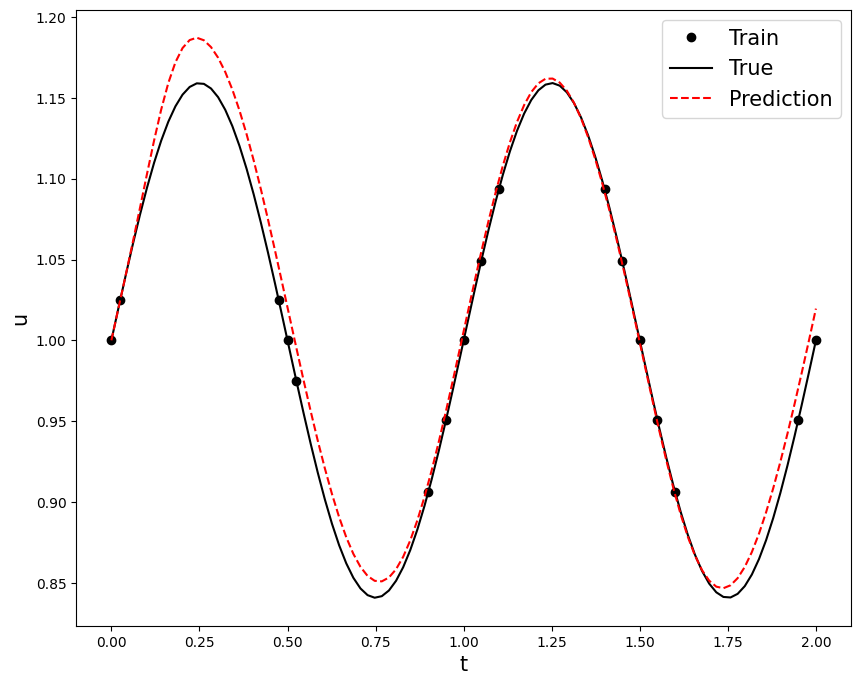

In [ ]:
test_t = np.linspace(0, 2, 100)

train_u = np.sin(2 * np.pi * train_t) / (2 * np.pi) + 1
true_u = np.sin(2 * np.pi * test_t) / (2 * np.pi) + 1
pred_u = NN.predict(test_t).ravel()

plt.figure(figsize=(10, 8))
plt.plot(train_t, train_u, "ok", label="Train")
plt.plot(test_t, true_u, "-k", label="True")
plt.plot(test_t, pred_u, "--r", label="Prediction")
plt.legend(fontsize=15)
plt.xlabel("t", fontsize=15)
plt.ylabel("u", fontsize=15)
plt.show()